In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa 
import pandas as pd
import random
import os
import seaborn as sns

##### 這邊都是參考原本的`observer_audio_function`的參數跟函式

In [2]:
# Audio params
SAMPLE_RATE = 22050  # (samples/sec)
DURATION = 5.0  # duration in second (sec)
AUDIO_LEN = int(SAMPLE_RATE * DURATION)  # total number of samples in DURATION

# Spectrogram params
N_MELS = 128  # freq axis, number of filters
N_FFT = 2048  # frame size
HOP_LEN = 512  # non-overlap region, which means 1/4 portion overlapping
SPEC_WIDTH = AUDIO_LEN // HOP_LEN + 1  # time axis
FMAX = SAMPLE_RATE // 2  # max frequency, based on the rule, it should be half of SAMPLE_RATE
SPEC_SHAPE = [N_MELS, SPEC_WIDTH]  # expected output spectrogram shape

In [78]:
def load_audio(filepath, sr=SAMPLE_RATE):  # load the audio
    audio, sr = librosa.load(filepath, sr=sr)
    return audio, sr

def get_mel_spectrogram_mean(audio, sr=SAMPLE_RATE):  # Get the mel-spectrogram
    spec = librosa.feature.melspectrogram(y=audio, sr=sr, fmax=FMAX, n_mels=N_MELS, hop_length=HOP_LEN, n_fft=N_FFT)
    spec = librosa.power_to_db(spec)  # Turn into log-scale
    spec_mean = np.mean(spec, axis=1)
    return spec_mean

def get_mfcc_mean(audio, sr=SAMPLE_RATE):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13, fmax=FMAX, n_mels=N_MELS, hop_length=HOP_LEN, n_fft=N_FFT)
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean

def get_chroma_mean(audio, sr=SAMPLE_RATE):
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr, n_chroma=12, n_fft=N_FFT, hop_length=HOP_LEN)
    # Take the mean of the chroma features along the time axis to get a 1D representation
    chroma_stft_mean = np.mean(chroma, axis=1)
    return chroma_stft_mean


參考https://www.kaggle.com/code/suryaabhinai/deepfake-voice當中畫分布圖的方法

##### 先用chroma_stft取平均的數據  
之前設計n_chroma =12，因此會有12個半音的平均

In [60]:
# 設定音檔所在的資料夾路徑
audio_folder = 'D:/CFAD/CFAD/clean_version/train_clean/real_clean/thchs30'

# 讀取資料夾內的所有音檔
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]
random.shuffle(audio_files)
audio_files = audio_files[:1000]     # 隨機取前1000筆資料

chroma_stft_mean = []
results = []
for audio_file in audio_files:
    # 完整的音檔路徑
    file_path = os.path.join(audio_folder, audio_file)
    audio, sr = load_audio(file_path, sr=SAMPLE_RATE)
    # 將檔案名與chroma_stft_mean跟分類標籤包在一個list中存入results
    chroma_stft_mean = get_chroma_mean(audio, sr=SAMPLE_RATE).tolist()
    results.append([audio_file] + chroma_stft_mean + [True])

# Convert the results to a pandas DataFrame
columns = ['Audio_name'] + [f'Chroma_{i+1}' for i in range(12)] + ['Label']
df = pd.DataFrame(results, columns=columns)

# Save the DataFrame to a CSV file
df.to_csv('chroma_stft_features.csv', index=False)

print(f"Chroma STFT features saved to chroma_stft_features.csv")

Chroma STFT features saved to chroma_stft_features.csv


##### 將以上的程式寫成function
存入csv是方便觀看

In [61]:
def write_chroma_to_csv(audio_source_folder, csv_filename, label):
    # 讀取資料夾內的所有音檔
    audio_files = [f for f in os.listdir(audio_source_folder) if f.endswith(('.wav', '.mp3'))]
    random.shuffle(audio_files)
    audio_files = audio_files[:500]     # 隨機取前500筆資料

    chroma_stft_mean = []
    results = []
    for audio_file in audio_files:
        # 完整的音檔路徑
        file_path = os.path.join(audio_source_folder, audio_file)
        audio, sr = load_audio(file_path, sr=SAMPLE_RATE)
        # 將檔案名與chroma_stft_mean包在一個list中存入results
        chroma_stft_mean = get_chroma_mean(audio, sr=SAMPLE_RATE).tolist()
        results.append([audio_file] + chroma_stft_mean + [label])

    # Convert the results to a pandas DataFrame
    columns = ['Audio_name'] + [f'Chroma_{i+1}' for i in range(12)] + ['Label']
    df = pd.DataFrame(results, columns=columns)

    # Check if CSV file exists
    if not os.path.isfile(csv_filename):
        # If file does not exist, write a new CSV file
        df.to_csv(csv_filename, index=False)
    else:
        # If file exists, append new content to the existing CSV file
        df.to_csv(csv_filename, mode='a', header=False, index=False)

##### 這邊都是合成語音

In [62]:
write_chroma_to_csv('D:/chou_fake', 'chroma_stft_features.csv', False)

write_chroma_to_csv('D:/lin_fake/1-100', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/lin_fake/101-200', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/lin_fake/201-300', 'chroma_stft_features.csv', False)

write_chroma_to_csv('D:/CFAD/elevenlabs/Adam', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Alice', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Antoni', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Brian', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Clyde', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Dave', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Domi', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Drew', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Emily', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Fin', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Josh', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Lily', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Paul', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Rachel', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Sam', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Sarah', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/Thomas', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech', 'chroma_stft_features.csv', False)
write_chroma_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech/TTS', 'chroma_stft_features.csv', False)

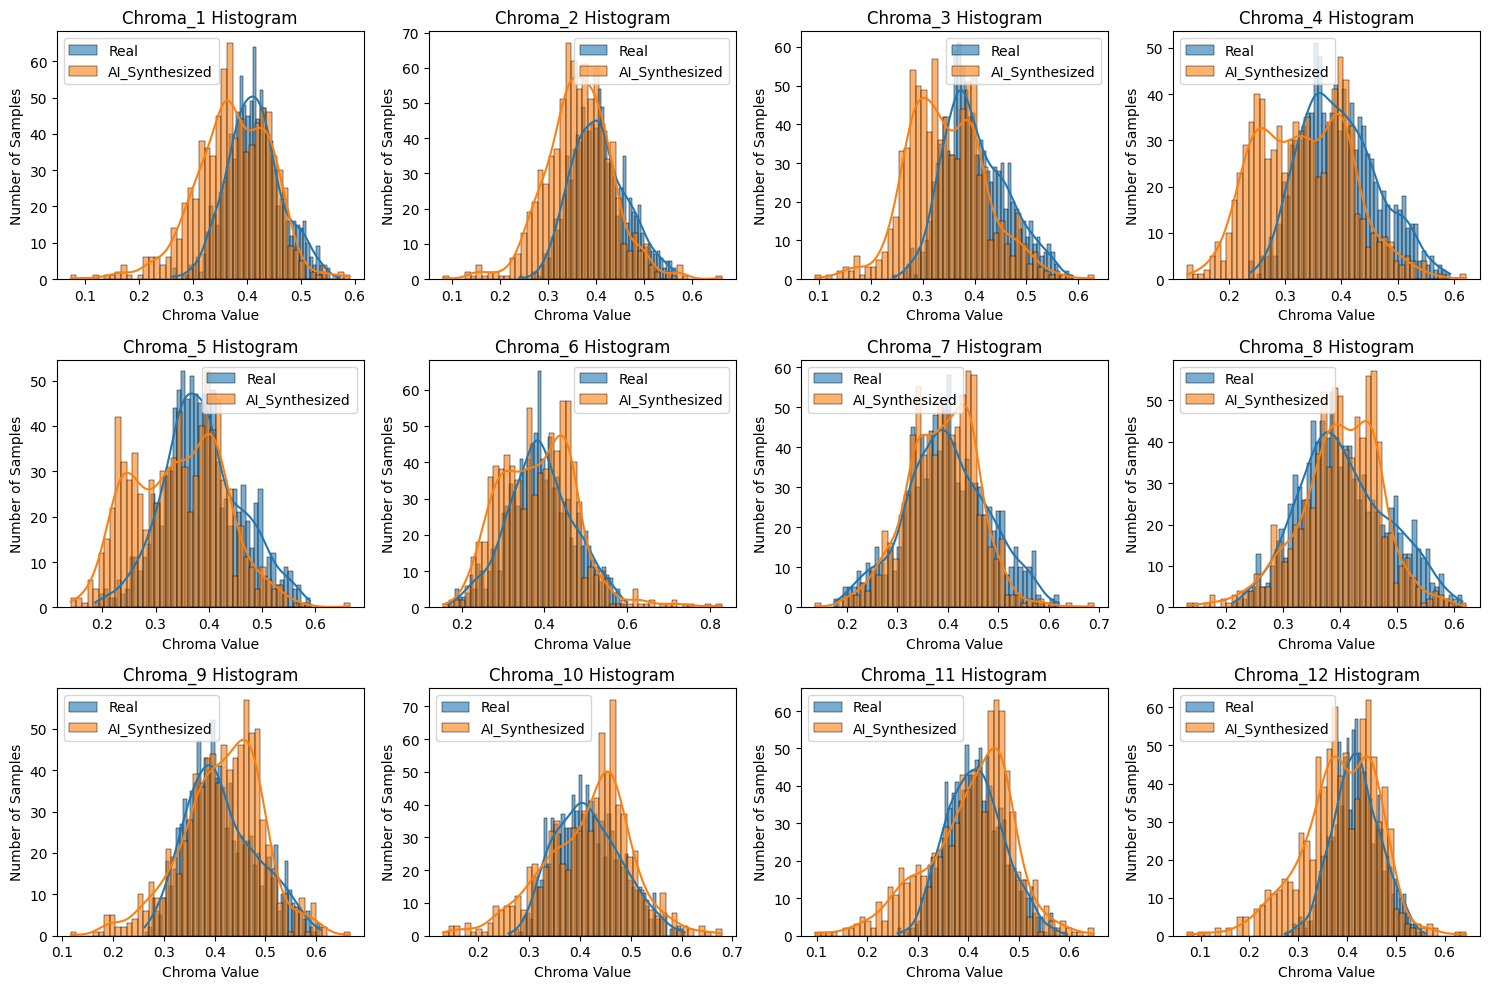

In [63]:
import seaborn as sns

# 讀取 CSV 文件中的數據
csv_filename = 'chroma_stft_features.csv'
df = pd.read_csv(csv_filename)

# 獲取所有標籤
labels = df['Label'].unique()   # [True, False]
# 分成真實(True)和合成(False)兩類
real_label = df[df['Label'] == labels[0]]
fake_label = df[df['Label'] == labels[1]]

# 根據標籤分組並繪製 Chroma 直方圖
count = 1
fig, axs = plt.subplots(3, 4, figsize=(15, 10)) # 3 rows, 4 columns

count = 1
for i in range(3):
    for j in range(4):
        col = df.columns[count]
        sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs[i, j])
        sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs[i, j])
        axs[i, j].set_title(f'Chroma_{count} Histogram')
        axs[i, j].set_xlabel('Chroma Value')
        axs[i, j].set_ylabel('Number of Samples')
        axs[i, j].legend()
        count += 1

plt.tight_layout()
plt.show()

兩者分布貼近，差異較小

MFCC

In [82]:
def write_to_csv(audio_source_folder, csv_filename, label, func, val):
    # 讀取資料夾內的所有音檔
    audio_files = [f for f in os.listdir(audio_source_folder) if f.endswith(('.wav', '.mp3'))]
    random.shuffle(audio_files)
    audio_files = audio_files[:1000]     # 隨機取前500筆資料

    chroma_stft_mean = []
    results = []
    for audio_file in audio_files:
        # 完整的音檔路徑
        file_path = os.path.join(audio_source_folder, audio_file)
        audio, sr = load_audio(file_path, sr=SAMPLE_RATE)
        # 將檔案名與chroma_stft_mean包在一個list中存入results
        mean = func(audio, sr=SAMPLE_RATE).tolist()
        results.append([audio_file] + mean + [label])

    # Convert the results to a pandas DataFrame
    columns = ['Audio_name'] + [f'{val}_{i+1}' for i in range(len(mean))] + ['Label']
    df = pd.DataFrame(results, columns=columns)

    # Check if CSV file exists
    if not os.path.isfile(csv_filename):
        # If file does not exist, write a new CSV file
        df.to_csv(csv_filename, index=False)
    else:
        # If file exists, append new content to the existing CSV file
        df.to_csv(csv_filename, mode='a', header=False, index=False)

In [106]:
write_to_csv('D:/CFAD/CFAD/clean_version/train_clean/real_clean/thchs30', 'mfcc_features.csv', True, get_mfcc_mean, 'mfcc')
print(f"MFCC features saved to mfcc_features.csv")

write_to_csv('D:/chou_fake', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')

write_to_csv('D:/lin_fake/1-100', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/lin_fake/101-200', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/lin_fake/201-300', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')

write_to_csv('D:/CFAD/elevenlabs/Adam', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Alice', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Antoni', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Brian', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Clyde', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Dave', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Domi', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Drew', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Emily', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Fin', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Josh', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Lily', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Paul', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Rachel', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Sam', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Sarah', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/Thomas', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech/TTS', 'mfcc_features.csv', False, get_mfcc_mean, 'mfcc')

MFCC features saved to mfcc_features.csv


In [107]:
def draw_distribution(csv_filename, rows, cols, max_count, val):
    # 讀取 CSV 文件中的數據
    df = pd.read_csv(csv_filename)

    # 獲取所有標籤
    labels = df['Label'].unique()   # [True, False]
    # 分成真實(True)和合成(False)兩類
    real_label = df[df['Label'] == labels[0]]
    fake_label = df[df['Label'] == labels[1]]

    # 根據標籤分組並繪製 Chroma 直方圖
    count = 1
    fig, axs = plt.subplots(rows, cols, figsize=(15, 10)) 

    count = 1
    for i in range(rows):
        for j in range(cols):
            col = df.columns[count]
            sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs[i, j])
            sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs[i, j])
            axs[i, j].set_title(f'{val}_{count} Histogram')
            axs[i, j].set_xlabel(f'{val} Value')
            axs[i, j].set_ylabel('Number of Samples')
            axs[i, j].legend()
            count += 1
            if count > max_count:
                break

    plt.tight_layout()
    plt.show()

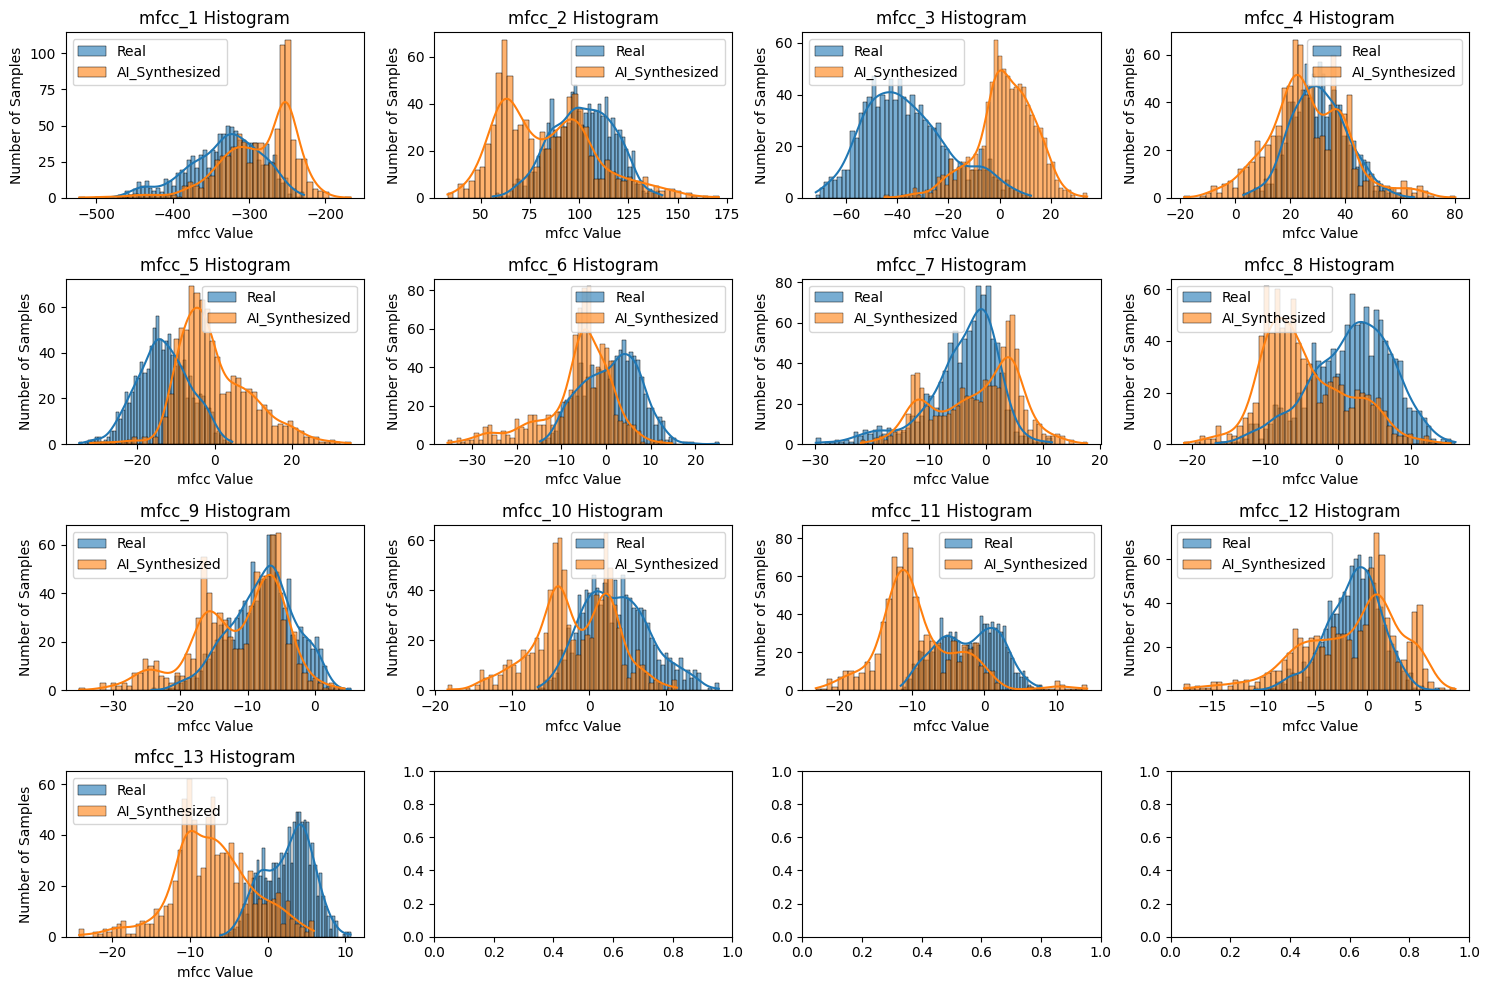

In [108]:
draw_distribution('mfcc_features.csv', 4, 4, 13, 'mfcc')

conclusion:
可以看出比較明顯的差異了，例如在mfcc_3跟mfcc_13當中，兩者分布重疊的部分較小。

melspectrogram

In [85]:
write_to_csv('D:/CFAD/CFAD/clean_version/train_clean/real_clean/thchs30', 'mel_spectrogram.csv', True, get_mel_spectrogram_mean, 'Mel_Spectrogram')
print(f"Mel Spectrogram features saved to mel_spectrogram.csv")

write_to_csv('D:/chou_fake', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean , 'Mel_Spectrogram')

write_to_csv('D:/lin_fake/1-100', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/lin_fake/101-200', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/lin_fake/201-300', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')

write_to_csv('D:/CFAD/elevenlabs/Adam', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Alice', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Antoni', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Brian', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Clyde', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Dave', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Domi', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Drew', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Emily', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Fin', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Josh', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Lily', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Paul', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Rachel', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Sam', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Sarah', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/Thomas', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech/TTS', 'mel_spectrogram.csv', False, get_mel_spectrogram_mean, 'Mel_Spectrogram')

Mel Spectrogram features saved to mel_spectrogram.csv


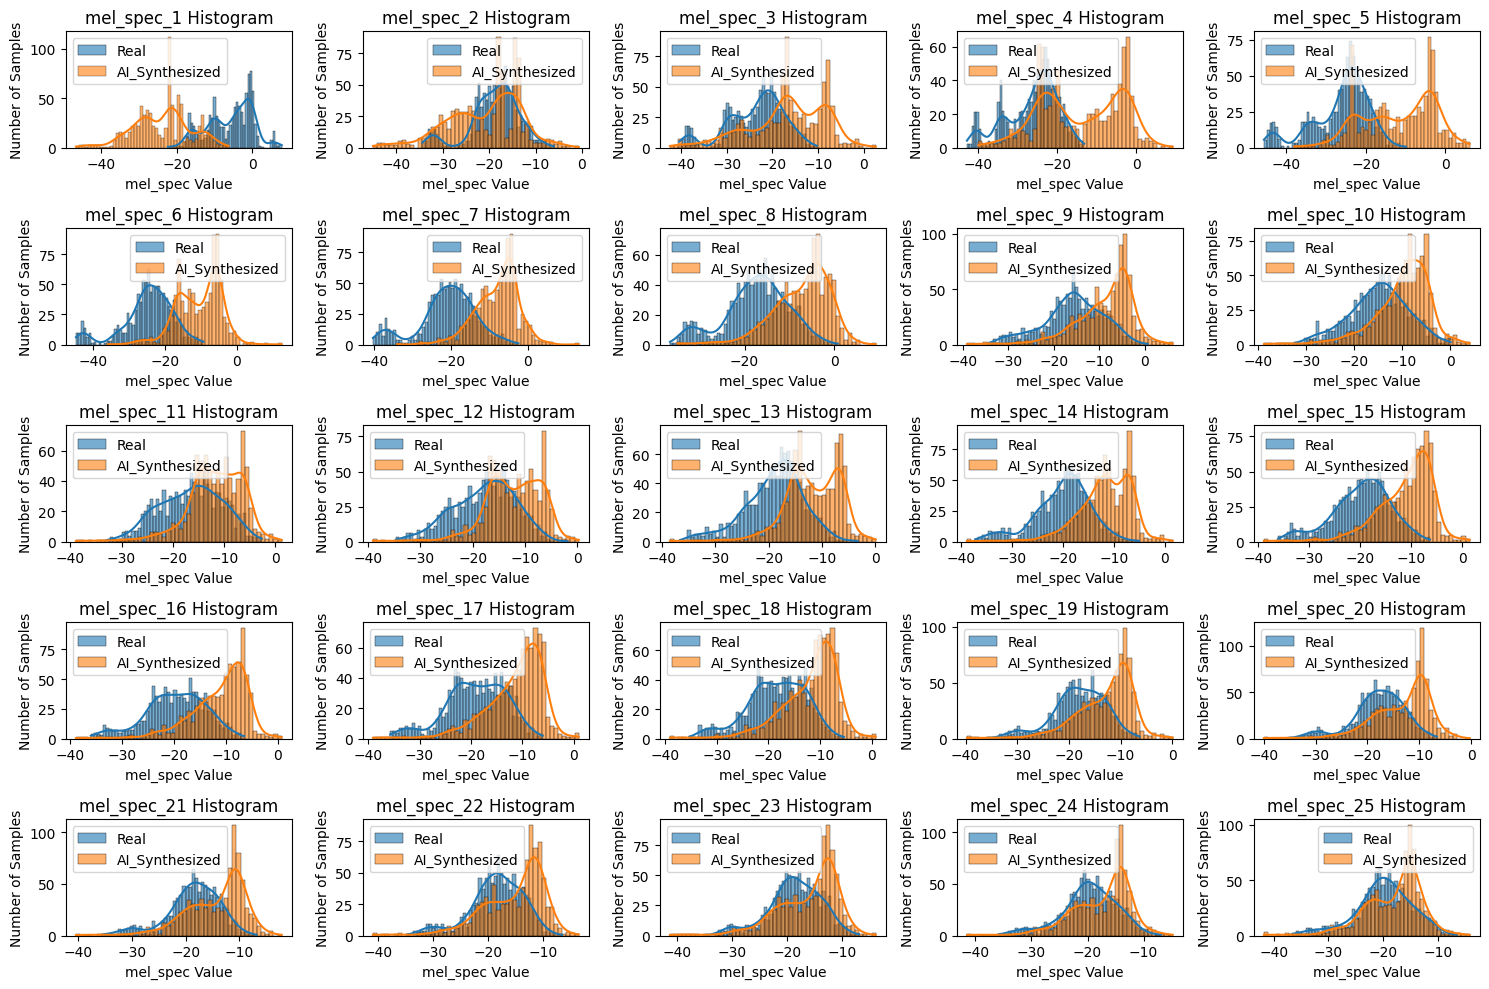

In [100]:
# 數量太多，不適合用draw_distribution函數
# 讀取 CSV 文件中的數據
csv_filename = 'mel_spectrogram.csv'
df = pd.read_csv(csv_filename)

# 獲取所有標籤
labels = df['Label'].unique()   # [True, False]
# 分成真實(True)和合成(False)兩類
real_label = df[df['Label'] == labels[0]]
fake_label = df[df['Label'] == labels[1]]

# 根據標籤分組並繪製 Chroma 直方圖
count = 1
fig, axs = plt.subplots(5, 5, figsize=(15, 10)) 

count = 1
for i in range(5):
    for j in range(5):
        col = df.columns[count]
        sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs[i, j])
        sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs[i, j])
        axs[i, j].set_title(f'mel_spec_{count} Histogram')
        axs[i, j].set_xlabel(f'mel_spec Value')
        axs[i, j].set_ylabel('Number of Samples')
        axs[i, j].legend()
        count += 1

plt.tight_layout()
plt.show()

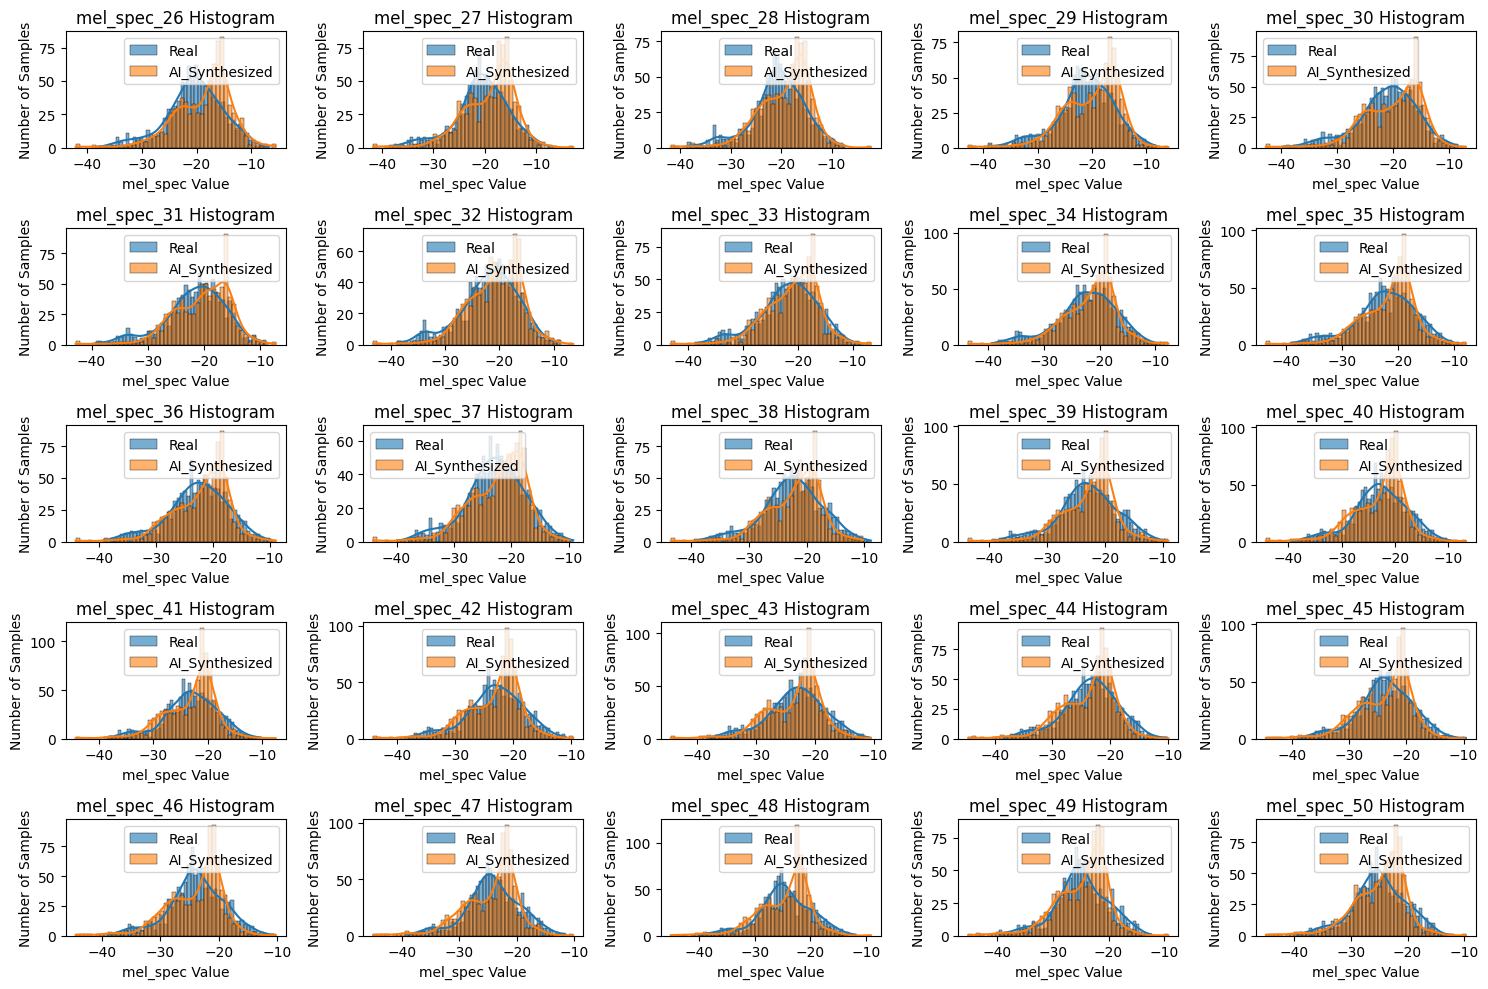

In [101]:
# 數量太多，不適合用draw_distribution函數
# 讀取 CSV 文件中的數據
csv_filename = 'mel_spectrogram.csv'
df = pd.read_csv(csv_filename)

# 獲取所有標籤
labels = df['Label'].unique()   # [True, False]
# 分成真實(True)和合成(False)兩類
real_label = df[df['Label'] == labels[0]]
fake_label = df[df['Label'] == labels[1]]

# 根據標籤分組並繪製 Chroma 直方圖
count = 1
fig, axs = plt.subplots(5, 5, figsize=(15, 10)) 

count = 25 + 1
for i in range(5):
    for j in range(5):
        col = df.columns[count]
        sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs[i, j])
        sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs[i, j])
        axs[i, j].set_title(f'mel_spec_{count} Histogram')
        axs[i, j].set_xlabel(f'mel_spec Value')
        axs[i, j].set_ylabel('Number of Samples')
        axs[i, j].legend()
        count += 1

plt.tight_layout()
plt.show()

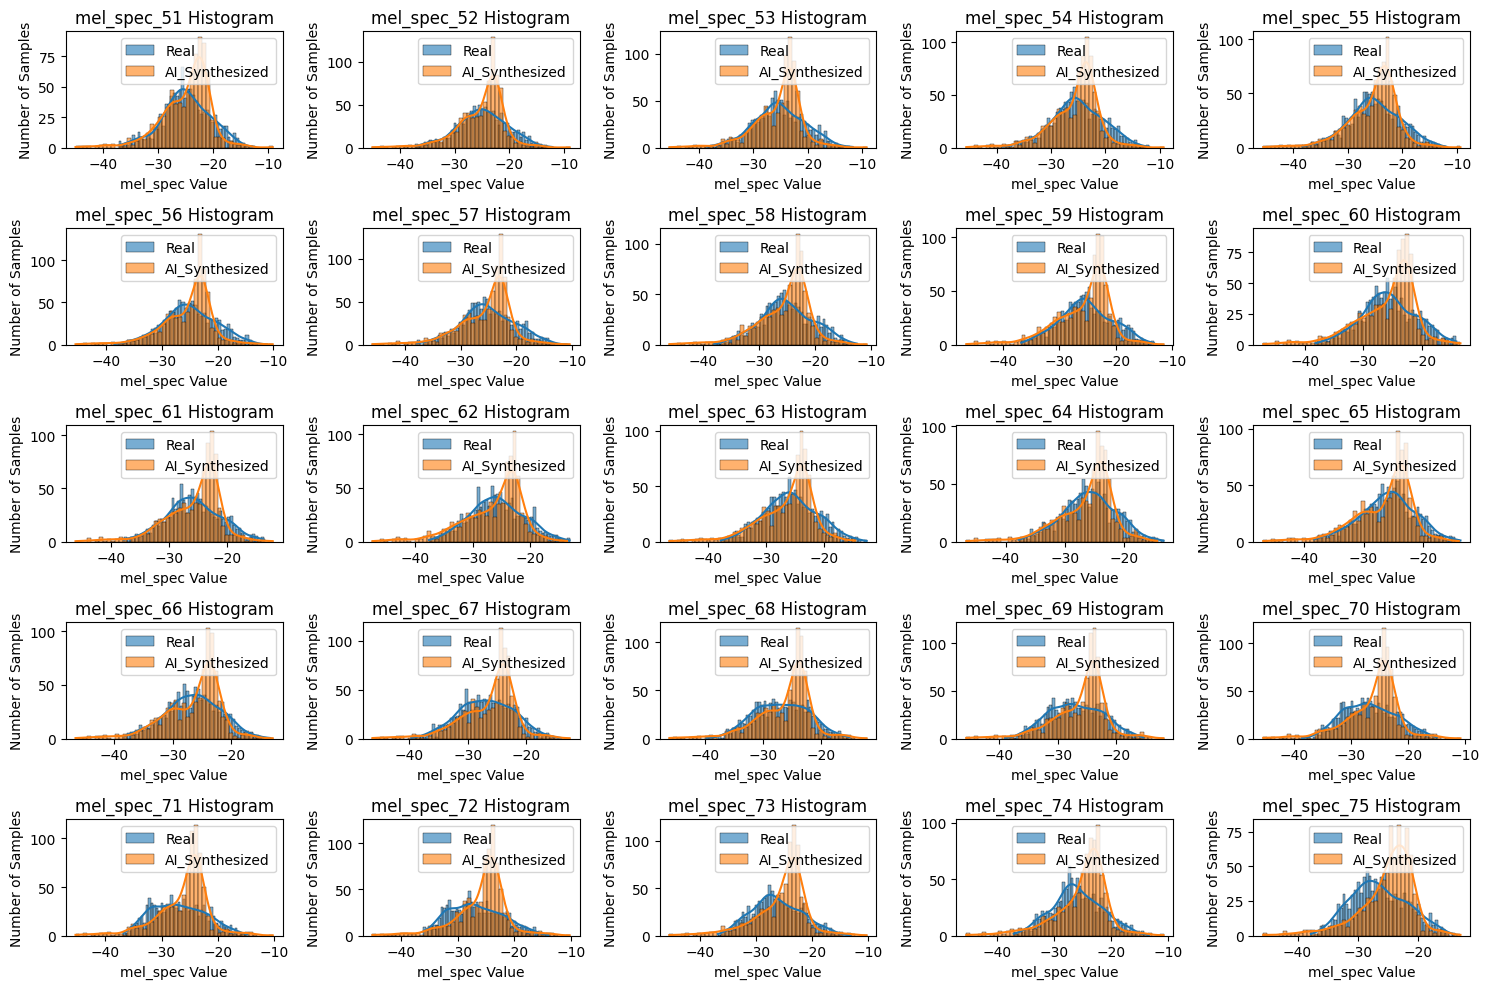

In [102]:
# 數量太多，不適合用draw_distribution函數
# 讀取 CSV 文件中的數據
csv_filename = 'mel_spectrogram.csv'
df = pd.read_csv(csv_filename)

# 獲取所有標籤
labels = df['Label'].unique()   # [True, False]
# 分成真實(True)和合成(False)兩類
real_label = df[df['Label'] == labels[0]]
fake_label = df[df['Label'] == labels[1]]

# 根據標籤分組並繪製 Chroma 直方圖
count = 1
fig, axs = plt.subplots(5, 5, figsize=(15, 10)) 

count = 25*2 + 1
for i in range(5):
    for j in range(5):
        col = df.columns[count]
        sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs[i, j])
        sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs[i, j])
        axs[i, j].set_title(f'mel_spec_{count} Histogram')
        axs[i, j].set_xlabel(f'mel_spec Value')
        axs[i, j].set_ylabel('Number of Samples')
        axs[i, j].legend()
        count += 1

plt.tight_layout()
plt.show()

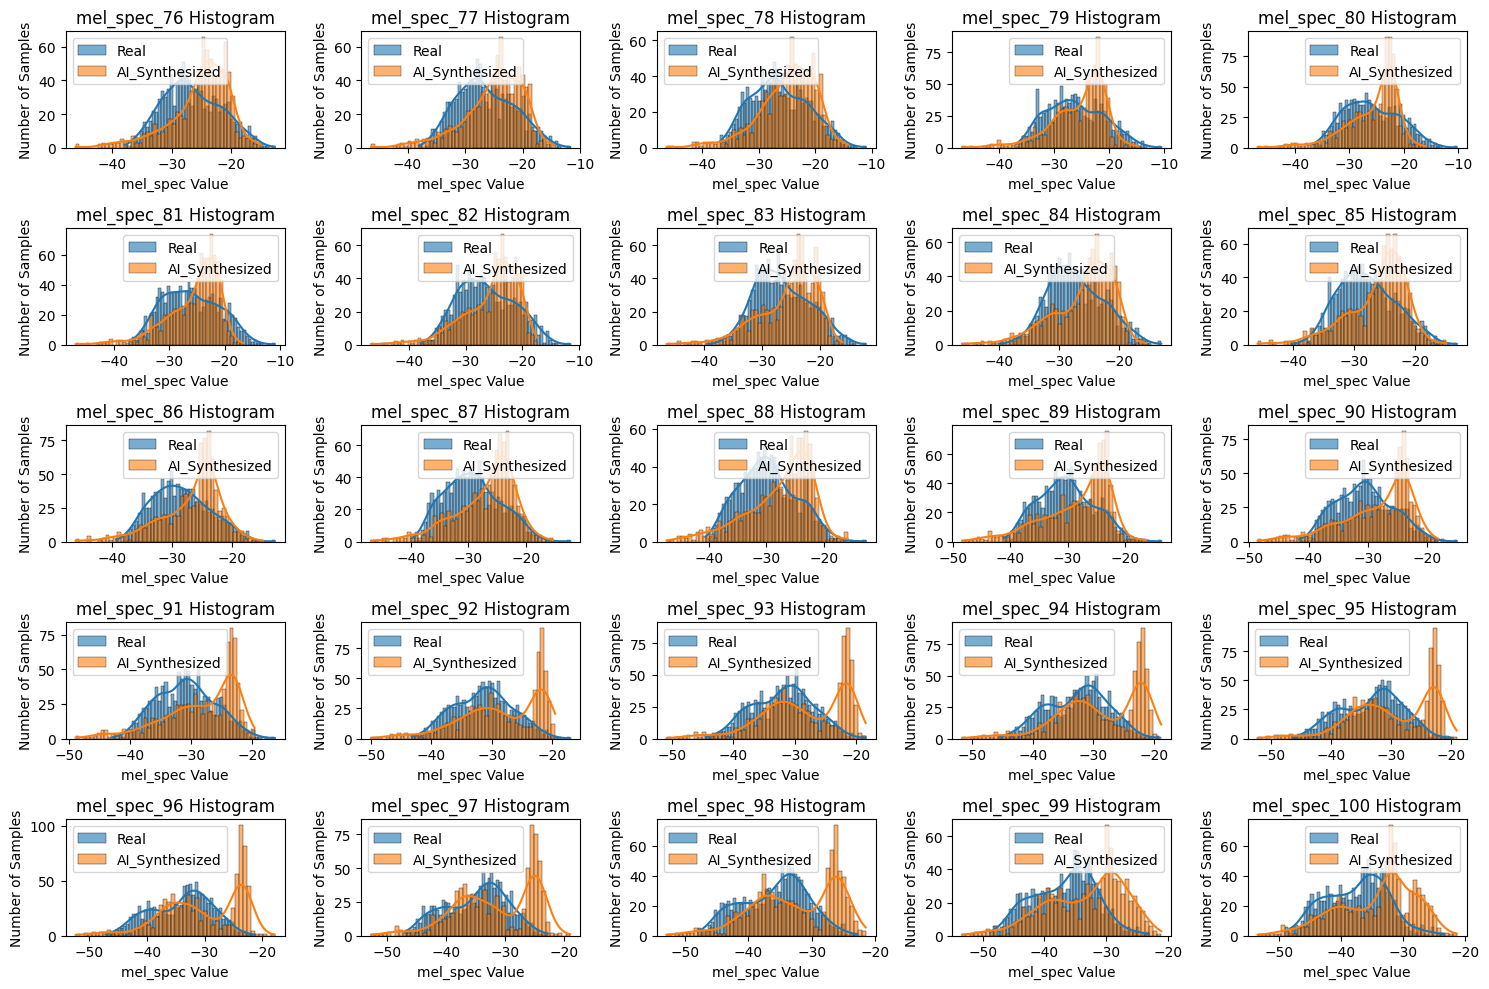

In [103]:
# 數量太多，不適合用draw_distribution函數
# 讀取 CSV 文件中的數據
csv_filename = 'mel_spectrogram.csv'
df = pd.read_csv(csv_filename)

# 獲取所有標籤
labels = df['Label'].unique()   # [True, False]
# 分成真實(True)和合成(False)兩類
real_label = df[df['Label'] == labels[0]]
fake_label = df[df['Label'] == labels[1]]

# 根據標籤分組並繪製 Chroma 直方圖
count = 1
fig, axs = plt.subplots(5, 5, figsize=(15, 10)) 

count = 25*3 + 1
for i in range(5):
    for j in range(5):
        col = df.columns[count]
        sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs[i, j])
        sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs[i, j])
        axs[i, j].set_title(f'mel_spec_{count} Histogram')
        axs[i, j].set_xlabel(f'mel_spec Value')
        axs[i, j].set_ylabel('Number of Samples')
        axs[i, j].legend()
        count += 1

plt.tight_layout()
plt.show()

已知合成語音，有些數值出現的比例較真實語音高。

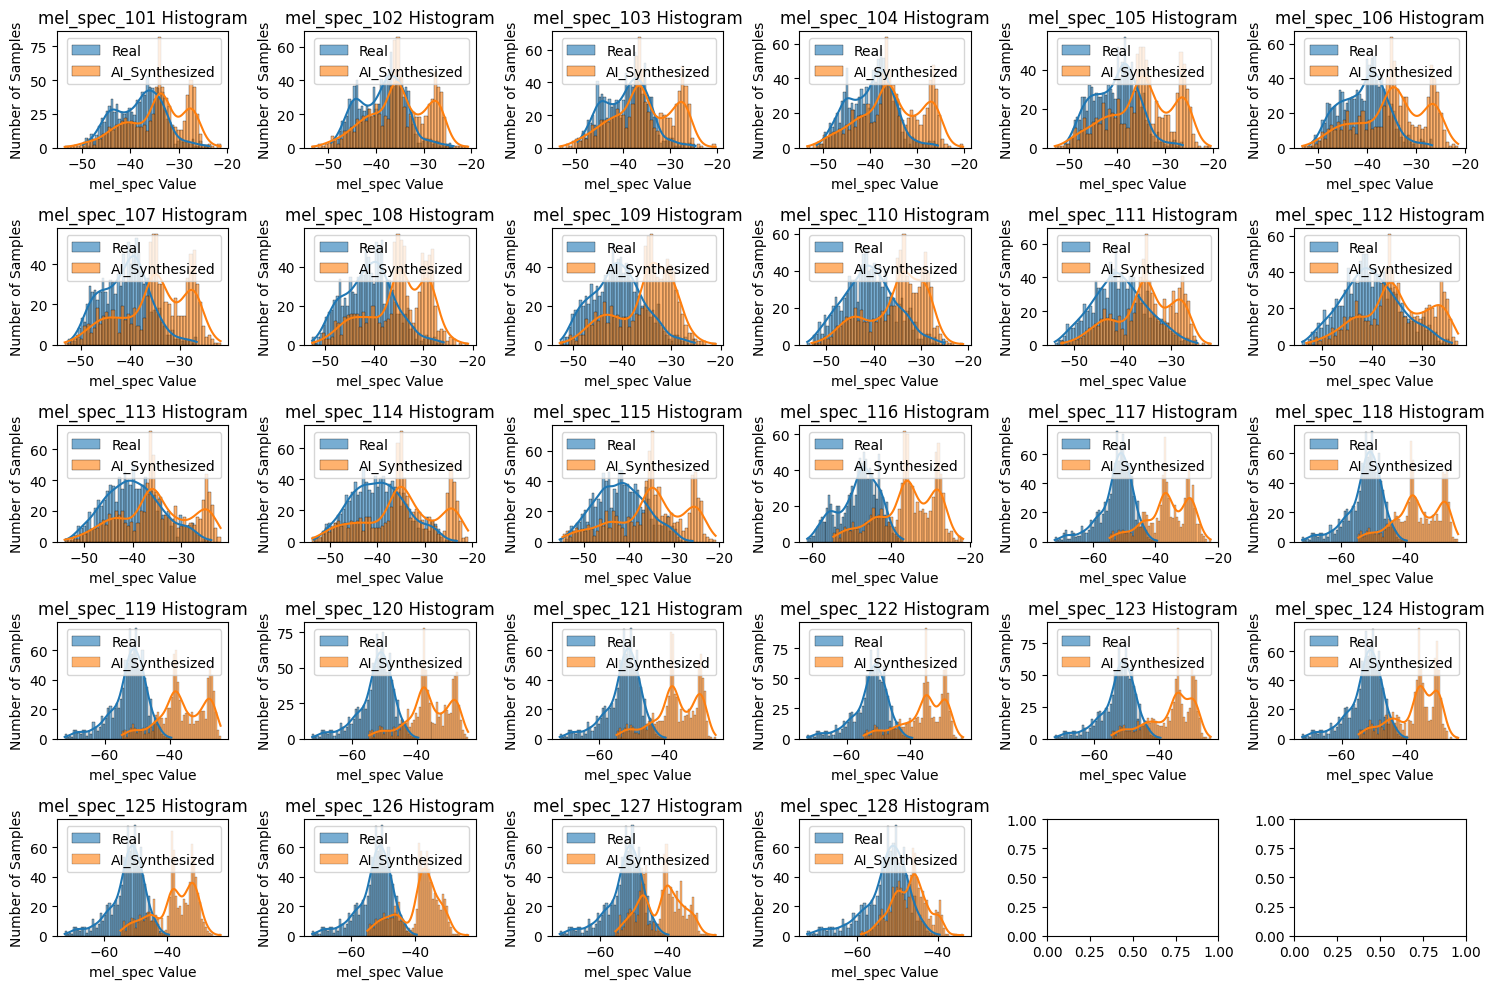

In [104]:
# 數量太多，不適合用draw_distribution函數
# 讀取 CSV 文件中的數據
csv_filename = 'mel_spectrogram.csv'
df = pd.read_csv(csv_filename)

# 獲取所有標籤
labels = df['Label'].unique()   # [True, False]
# 分成真實(True)和合成(False)兩類
real_label = df[df['Label'] == labels[0]]
fake_label = df[df['Label'] == labels[1]]

# 根據標籤分組並繪製 Chroma 直方圖
count = 1
fig, axs = plt.subplots(5, 6, figsize=(15, 10)) 

count = 25*4 + 1
for i in range(5):
    for j in range(6):
        col = df.columns[count]
        sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs[i, j])
        sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs[i, j])
        axs[i, j].set_title(f'mel_spec_{count} Histogram')
        axs[i, j].set_xlabel(f'mel_spec Value')
        axs[i, j].set_ylabel('Number of Samples')
        axs[i, j].legend()
        count += 1
        if count > 128:
            break

plt.tight_layout()
plt.show()

結論近似於mfcc，也會有兩者分布重疊較小的情況出現，例如在某些值下出現的個數較多，這可能是合成語音的判斷因素之一?